#IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, matthews_corrcoef, cohen_kappa_score, balanced_accuracy_score
from collections import defaultdict

#DATASET

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
X = np.load("./X.npy")
Y = np.load("./Y.npy")

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

#RANDOM FOREST CLASSIFIER

In [5]:
rfc_gridcv = RandomForestClassifier(random_state=42, class_weight="balanced")

parameter_grid = {'n_estimators':[20,50],
                  'max_depth':[10,20],
                  'criterion':['gini','entropy']
                 }
from sklearn.model_selection import GridSearchCV
gridCV_rf = GridSearchCV(estimator = rfc_gridcv, param_grid = parameter_grid, cv=5)

gridCV_rf.fit(X_train,y_train)
gridCV_rf.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}

In [6]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20, max_depth=10, criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=20)

In [7]:
y_pred = rfc.predict(X_test)

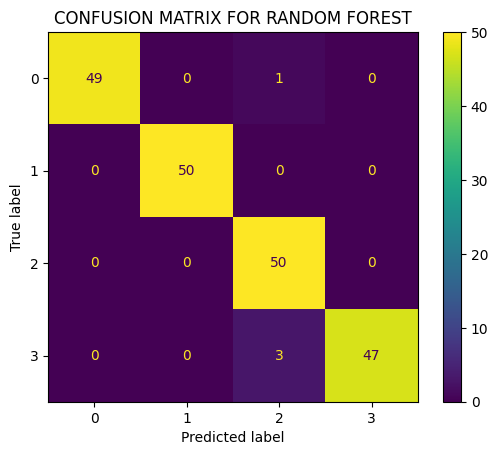

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)
matrix_figure = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
matrix_figure.plot()
plt.title("CONFUSION MATRIX FOR RANDOM FOREST")
plt.show()

In [9]:
X_train_df = pd.DataFrame(X_train, )
X_train_df.columns = np.arange(0,66).tolist()

In [10]:
X_train_df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
      dtype='int64')

In [11]:
feat_importance = np.array(rfc.feature_importances_)
feat_names = np.array(X_train_df.columns)
imp_data = {'feature_name':feat_names,'feature_importance':feat_importance}
feat_imp_df = pd.DataFrame(imp_data)
feat_imp_df.sort_values(by=['feature_importance'],ascending=False,inplace=True)

feat_imp_df.head(10)

# plt.figure(figsize=(14,10))
# sns.barplot(x=feat_imp_df['feature_importance'][:50], y=feat_imp_df['feature_name'][:50], palette='plasma')
# plt.title('FEATURE IMPORTANCE OF ALL FEATURES IN THE RANDOM FOREST CLASSIFIER')
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature Name')

,feature_name,feature_importance
39,39,0.128960
1,1,0.080867
60,60,0.074338
37,37,0.074330
6,6,0.068779
24,24,0.063782
38,38,0.058344
4,4,0.055271
40,40,0.053412
14,14,0.045285


#GRADIENT BOOSTING CLASSIFIER

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
gb_gridcv = GradientBoostingClassifier(random_state = 42)

parameter_grid = {'loss':['log_loss','exponential'],
                  'learning_rate':[0.01,0.1],
                  'n_estimators':[10,30,50],
                  'max_depth':[2,3,5,10],
                  'max_features':['sqrt','log2']
                  }

gridCV_gb = GridSearchCV(estimator = gb_gridcv, param_grid = parameter_grid, cv=5, verbose=3)

gridCV_gb.fit(X_train,y_train)
gridCV_gb.best_params_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END learning_rate=0.01, loss=log_loss, max_depth=2, max_features=sqrt, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, loss=log_loss, max_depth=2, max_features=sqrt, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, loss=log_loss, max_depth=2, max_features=sqrt, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.01, loss=log_loss, max_depth=2, max_features=sqrt, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.01, loss=log_loss, max_depth=2, max_features=sqrt, n_estimators=10;, score=0.994 total time=   0.0s
[CV 1/5] END learning_rate=0.01, loss=log_loss, max_depth=2, max_features=sqrt, n_estimators=30;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.01, loss=log_loss, max_depth=2, max_features=sqrt, n_estimators=30;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.01, lo

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hp\AppData\Local\P

{'learning_rate': 0.01,
 'loss': 'log_loss',
 'max_depth': 2,
 'max_features': 'sqrt',
 'n_estimators': 10}

In [13]:
gb = GradientBoostingClassifier(random_state=42,learning_rate=0.01,loss="log_loss",max_depth=2,max_features="sqrt",n_estimators=10)
gb.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=2, max_features='sqrt',
                           n_estimators=10, random_state=42)

In [14]:
y_pred = gb.predict(X_test)

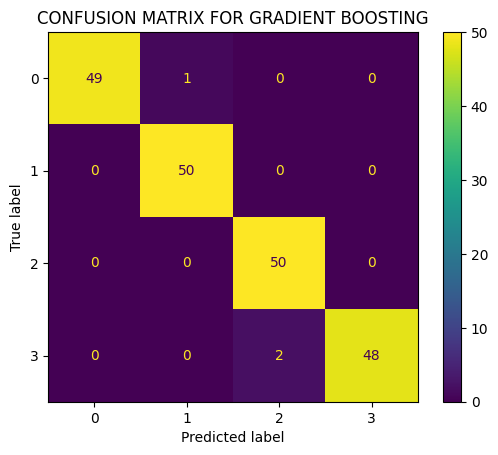

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
matrix_figure = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
matrix_figure.plot()
plt.title("CONFUSION MATRIX FOR GRADIENT BOOSTING")
plt.show()

#KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn_gridcv = KNeighborsClassifier(n_jobs=-1)

parameter_grid = {'n_neighbors':[3,10],
                  'weights':['uniform','distance'],
                  'p':[1,2]
                  }

gridCV_knn = GridSearchCV(estimator = knn_gridcv, param_grid = parameter_grid, cv=5, verbose=3)

gridCV_knn.fit(X_train,y_train)
gridCV_knn.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END n_neighbors=3, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 2/5] END n_neighbors=3, p=1, weights=uniform;, score=0.988 total time=   0.0s
[CV 3/5] END n_neighbors=3, p=1, weights=uniform;, score=0.994 total time=   0.0s
[CV 4/5] END n_neighbors=3, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 5/5] END n_neighbors=3, p=1, weights=uniform;, score=0.988 total time=   0.0s
[CV 1/5] END n_neighbors=3, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 2/5] END n_neighbors=3, p=1, weights=distance;, score=0.988 total time=   0.0s
[CV 3/5] END n_neighbors=3, p=1, weights=distance;, score=0.994 total time=   0.0s
[CV 4/5] END n_neighbors=3, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 5/5] END n_neighbors=3, p=1, weights=distance;, score=0.988 total time=   0.0s
[CV 1/5] END n_neighbors=3, p=2, weights=uniform;, score=0.981 total time=   0.0s
[CV 2/5] END n_neighbors=3, p=2, 

{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3, weights="uniform" , p=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [18]:
y_pred = knn.predict(X_test)

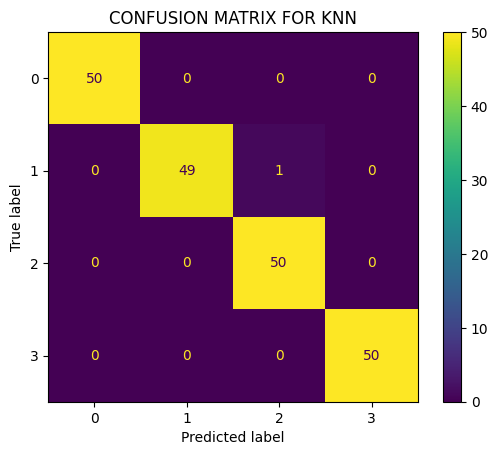

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)
matrix_figure = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
matrix_figure.plot()
plt.title("CONFUSION MATRIX FOR KNN")
plt.show()

#Prediction

In [20]:
class DFA:
    # def __init__(self):
    #     self.transitions = defaultdict(dict)
    #     self.final_states = set()
    #     self.dead_end = set()

    def __init__(self, s=None):
        self.transitions = defaultdict(dict)
        self.final_states = set()
        self.dead_end = set()
        if s!=None:
            for i in range(len(s)):
                self.transitions[(i, s[i])] = i + 1
            self.final_states.add(len(s))
            self.dead_end.add(len(s))

    def DFA_id(self):
        for i in range(26):
            ch = chr(ord('a') + i)
            chc = chr(ord('A') + i)
            self.transitions[(0, ch)] = 1
            self.transitions[(0, chc)] = 1
            self.transitions[(1, chc)] = 1
            self.transitions[(1, ch)] = 1
        for i in range(10):
            ch = chr(ord('0') + i)
            self.transitions[(1, ch)] = 1
        self.transitions[(1, '_')] = 1
        self.final_states.add(1)

    def DFA_num(self):
        for i in range(1, 10):
            ch = chr(ord('0') + i)
            self.transitions[(0, ch)] = 1
        for i in range(10):
            ch = chr(ord('0') + i)
            self.transitions[(1, ch)] = 1
        self.transitions[(0, '0')] = 2
        self.final_states.add(1)
        self.final_states.add(2)

    def parse(self, s):
        # 0->DEAD, 1->MATCH, 2->MATCH&POTENTIAL, 3->POTENTIAL
        curr_state = 0
        for i in range(len(s)):
            if (curr_state, s[i]) not in self.transitions:
                return 0
            curr_state = self.transitions[(curr_state, s[i])]
        if curr_state in self.final_states:
            if curr_state in self.dead_end:
                return 1
            return 2
        return 3

def initialiseTokens():
    tokens = []
    s = [
        #C++
        "include", "bits/stdc++.h", "iostream", "using", "namespace", "std", "main", "cout", "cin", ">>", "<<", "push_back", "vector", "long long", ";", "scanf", "%d", "size", "ll",
        #python
        "def", "print", ":", "import", "from", "input()", "range", "in", "elif", "len", "enumerate",
        #java
        "public static void main", "public void main", "System", "Scanner", "java", "util", "io", "String", "args",
        #sql
        "SELECT", "FROM", "WHERE", "INSERT", "UPDATE", "DELETE", "ALTER", "CREATE", "PRIMARY KEY", "FOREIGN KEY", "UNIQUE", "ORDER BY", "GROUP BY", "HAVING", "JOIN", "IN", "DISTINCT", "AS",
        #COMMON
        "(", ")", "{", "}", ".", "#", "->"
    ]
    for st in s:
        d = DFA(st)
        tokens.append(d)

    d1 = DFA()
    d1.DFA_num()
    tokens.append(d1)
    d2 = DFA()
    d2.DFA_id()
    tokens.append(d2)
    return tokens

def getFeatureVector(file_path):
    with open(file_path, "r") as filesrc:
        sourceCode = " ".join(line.strip() for line in filesrc)
    # print(sourceCode)
    srcCode = ""
    for i in range(len(sourceCode)):
        if sourceCode[i]==' ':
            if i!=0:
                if sourceCode[i-1]!=' ':
                    srcCode = srcCode + sourceCode[i]
        else:
            srcCode = srcCode + sourceCode[i]
    sourceCode = srcCode
    # print(sourceCode)
    tokens = initialiseTokens()
    prevMatchedToken = -1
    prevMatchedTokenIdx = -1
    curr = ""
    res = []
    i=0
    count_wrong=1
    while i<len(sourceCode):
        char=sourceCode[i]
        if 1==0:
            #does nothing
            piyosx=2
        else:
            curr += char
            pot = False
            match = False
            for d in range(len(tokens)):
                val = tokens[d].parse(curr)
                if val >= 2:
                    pot = True
                if (val == 1 or val == 2) and not match:
                    prevMatchedToken = d
                    prevMatchedTokenIdx = i
                    match = True
                    # print(f"MATCHED {curr} {d}")
            if not pot:
                if prevMatchedToken == -1:
                    curr = ""
                    i=prevMatchedTokenIdx+count_wrong
                    count_wrong+=1
                    continue
                count_wrong=1
                lexeme = curr[:len(curr)-i + prevMatchedTokenIdx]
                # print(f"TRYING TO PUSH {lexeme} FROM {curr}")
                tok = prevMatchedToken
                res.append((lexeme, tok))
                prevMatchedToken = -1
                curr = ""
                i = prevMatchedTokenIdx
        if i == len(sourceCode) - 1:
            if prevMatchedToken == -1:
                i=i+1
                continue
            count_wrong=1
            lexeme = curr[:len(curr)-i + prevMatchedTokenIdx]
            tok = prevMatchedToken
            res.append((lexeme, tok))
            prevMatchedToken = -1
            curr = ""
            i = prevMatchedTokenIdx

        i=i+1
    feature_vector = []
    Y = []#0->C++ 1->PYTHON 2->JAVA 3->SQL
    for i in range(len(tokens)):
        feature_vector.append(0)
    for p in res:
        # print(f"{p[0]} {p[1]}")
        feature_vector[p[1]]+=1
    return feature_vector

In [21]:
def predict(path, model):
    curr_feature_vector = getFeatureVector(path)
    # print(curr_feature_vector)
    pred=model.predict([curr_feature_vector])
    pred = pred[0]
    if pred==1:
        return "C++"
    elif pred==2:
        return "Java"
    elif pred==3:
        return "Python"
    elif pred==4:
        return "SQL"
    else:
        return "error!"


In [22]:

path="./forTest/test3.py"
predict(path, rfc)


'Python'